# Computer Problem Set 2 : Simulation of the Brownian Motion

## Imane Farhat

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1 : Forward simulation of {$W_{t_1^n}, ..., W_{t_n^n}$}

### Question 1.a
W is a brownian motion, therefore $(W_{t_{i+1}^n}-W_{t_i^n})_{0\leq i \leq 2^n}$ is an independent sequence of random variables such that $$W_{t_{i+1}^n}-W_{t_i^n} \sim N(0,t_{i+1}^n -  t_i^n) $$
ie $W_{t_{i+1}^n}-W_{t_i^n} \sim N(0,\Delta T) $ given that $t_{i+1}^n -  t_i^n = \Delta T$ .
Therefore there exists an iid family of $N(0,1)$ random variables $(Z_i)_{0\leq i \leq 2^n}$ such that : $$W_{t_{i+1}^n}-W_{t_i^n} = \sqrt{\Delta T} Z_i $$

### Question 1.b

In [3]:
T=1

def forward_brownian_motion(n,m):
    
    dT=T*(2**(-n))
    Z=np.random.randn(m, 2**n)*np.sqrt(dT)
    
    return np.concatenate((np.zeros([m,1]) , np.cumsum(Z, axis=1)), axis=1)


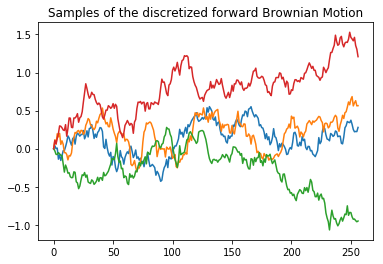

In [30]:
B=forward_brownian_motion(8,4)
for i in range(len(B)):
    plt.plot(B[i])
plt.title("Samples of the discretized forward Brownian Motion")
plt.show()

### Question 1.c
The theory predicts that $$E(W_T)=0$$ and $$ Var(W_T)=T=1$$ and $$ Cov(W_T, W_\frac{T}{2})= \begin{bmatrix}
    T       & \frac{T}{2}  \\
    \frac{T}{2}       & \frac{T}{2} \\
\end{bmatrix} $$
Therefore the first coefficient of this matrix should be 1, and the other ones 0.5 .

In [5]:
m=1000
n=10
B=forward_brownian_motion(n,m)

def empirical_mean(B):
    B=B[:,-1]
    return np.mean(B)

def empirical_variance(B):
    
    B=B[:,-1]
    return np.var(B)

def sample_covariance(B):
    
    nn = int(np.log2(len(B[0])))
    BT=B[:,-1]
    BT2=B[:,2**(nn-1)]

    return np.cov(BT, BT2)

In [6]:
print("Empirical mean of W_T (n=10) is : %0.4f" %empirical_mean(B))
print("Empirican variance of W_T (n=10) is : %0.4f" %empirical_variance(B))
print("Sample covariance between W_T and W_T/2 (n=10) is : " )
print(sample_covariance(B))

Empirical mean of W_T (n=10) is : -0.0802
Empirican variance of W_T (n=10) is : 0.9152
Sample covariance between W_T and W_T/2 (n=10) is : 
[[0.91607415 0.48321682]
 [0.48321682 0.49380209]]


In [7]:
n=15
B=forward_brownian_motion(n,m)

print("Empirical mean of W_T (n=15) is : %0.4f" %empirical_mean(B))
print("Empirican variance of W_T (n=15) is : %0.4f" %empirical_variance(B))
print("Sample covariance between W_T and W_T/2 (n=15) is : " )
print(sample_covariance(B))


Empirical mean of W_T (n=15) is : 0.0069
Empirican variance of W_T (n=15) is : 0.9741
Sample covariance between W_T and W_T/2 (n=15) is : 
[[0.97507857 0.49643584]
 [0.49643584 0.5139318 ]]


The empirical mean is close to its theoretical value of 0, and the variance to its theoretical value of 1.
The value of the first coefficient of the matrix is closer to its real value with a greater value of n. And the other coefficients of the matrix are closer to 0.5 and therefore are more precise when using a great value of n.

## Question 2 : Backward simulation of {$W_{t_1^n}, ..., W_{t_n^n}$}

### Question 2.a
Let's justify that $W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) $ has a Gaussian distribution with mean $\overline{x}=\frac{x_1+x_2}{2}$ and conditional variance $\frac{s_2-s_1}{4}$ with $\overline{s}=\frac{s_1+s_2}{2}$

We know that $$W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) = W_{s_1} + (W_\overline{s} - W_{s_1} )| (W_{s_1}=x_1, W_{s_2}=x_2) $$


We also know that $W_{s_1}$ and $W_\overline{s} - W_{s_1}$ are indepedent. So are $W_{s_1}$ and $W_{s_2} - W_{s_1}$.

We therefore have : $$W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) = x_1 + (W_\overline{s} - W_{s_1}) | (W_{s_2} - W_{s_1}=x_2 - x_1)$$

Let's define $ Z_{t-s_1}=W_t - W_{s_1}$, we then have :

$$W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) = x_1 + Z_{\overline{s}-s_1} | (Z_{s_2-s_1}=x_2 - x_1)$$ 

$Z$ is also a brownian motion, therefore $Z_{\overline{s}-s_1} | (Z_{s_2-s_1}=x_2 - x_1)$ is Gaussian with characteristics :
$$ E(Z_{\overline{s}-s_1} | (Z_{s_2-s_1}=x_2 - x_1) = \frac{\overline{s}-s_1}{s_2-s_1} (x_2 - x_1)$$
and 
$$Var(Z_{\overline{s}-s_1} | (Z_{s_2-s_1}=x_2 - x_1) = (\overline{s}-s_1) (1 - \frac{\overline{s}-s_1}{s_2-s_1})$$

Therefore $W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2)$ is Gaussian, with characteristics :
$$ E(W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2)) = x_1 + \frac{\overline{s}-s_1}{s_2-s_1} (x_2 - x_1) $$
$$ Var(W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2)) = (\overline{s}-s_1) (1 - \frac{\overline{s}-s_1}{s_2-s_1})$$

After simplification, we find : 
$$ E(W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2)) = \frac{x_1 + x_2}{2} := \overline{x}$$
$$ Var(W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2)) = \frac{s_2-s_1}{4}$$

Finally :
$$ W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) \sim N(\frac{x_1 + x_2}{2}, \frac{s_2-s_1}{4})$$

### Question 2.b

Let's justify that the conditional distribution of $W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\notin [s_1,s_2]})$ is $N(\overline{x}, \frac{s_2-s_1}{4})$

We know that :
$$ W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\notin [s_1,s_2]}) = W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u \in [0,s_1[}, (W_u)_{u \in [s_2, +\infty[}) $$

By using the strong Markovian property, we have :

$$ W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\notin [s_1,s_2]}) = W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u \in [s_2, +\infty[}) $$

$$= W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u - W_{s_2})_{u \in [s_2, +\infty[}) $$
$$ = W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2) $$

because $(W_u - W_{s_2})_{u \in [s_2, +\infty[}$ is independent of $W_\overline{s}$.

Then using the result of question 2.a, we have : 

$$ W_\overline{s} | (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\notin [s_1,s_2]}) \sim N(\overline{x}, \frac{s_2-s_1}{4}) $$

### Question 2.c

In [8]:
def backward_brownian_motion(n,m):
    
    dT=T*(2**(-n))
    W=np.zeros((m, 1+2**n))
    W[:,-1]=np.random.randn(m)*np.sqrt(T)
    
    for i in range(1,n+1):
        for k in range(2**(i-1)):
            upper_index = (k+1)*(2**(n-i+1))
            lower_index =   k  *(2**(n-i+1))

            W[:,(2*k+1)*2**(n-i)] = np.random.normal( ( W[:,lower_index] + W[:,upper_index] )/2 , np.sqrt(T/2**(i+1)) )
        
            
    return W

Text(0.5, 1.0, 'Samples of the discretized backward Brownian Motion')

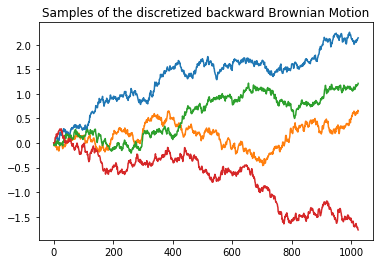

In [9]:
B=backward_brownian_motion(10,4)
for b in B:
    plt.plot(b)
plt.title("Samples of the discretized backward Brownian Motion")

### Question 2.d

In [10]:
m=1000
n=10
B=backward_brownian_motion(n,m)

print("Empirical mean of W_T (n=10) is : %0.4f" %empirical_mean(B))
print("Empirican variance of W_T (n=10) is : %0.4f" %empirical_variance(B))
print("Sample covariance between W_T and W_T/2 (n=10) is : " )
print(sample_covariance(B))

Empirical mean of W_T (n=10) is : -0.0030
Empirican variance of W_T (n=10) is : 0.9658
Sample covariance between W_T and W_T/2 (n=10) is : 
[[0.96676746 0.52683906]
 [0.52683906 0.53680711]]


In [11]:
n=15
B=backward_brownian_motion(n,m)

print("Empirical mean of W_T (n=15) is : %0.4f" %empirical_mean(B))
print("Empirican variance of W_T (n=15) is : %0.4f" %empirical_variance(B))
print("Sample covariance between W_T and W_T/2 (n=15) is : " )
print(sample_covariance(B))

Empirical mean of W_T (n=15) is : 0.0052
Empirican variance of W_T (n=15) is : 0.9908
Sample covariance between W_T and W_T/2 (n=15) is : 
[[0.99177913 0.49638536]
 [0.49638536 0.49564072]]


The results using a greater value of n are more accurate, regarding the mean, the variance as well as the correlation matrix.


### Question 3

In [40]:
def quadratic_variation(W):
    return np.sum(np.array([x-y for x,y in zip(W,W[1:])])**2)

In [41]:
qv_forward=[]
qv_backward=[]
for n in range(10,21):
    B_for=forward_brownian_motion(n,1)[0]
    B_back=backward_brownian_motion(n,1)[0]
    qv_backward.append(quadratic_variation(B_back))
    qv_forward.append(quadratic_variation(B_for))


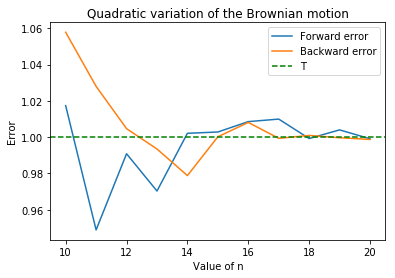

In [44]:
plt.plot(list(range(10,21)), qv_forward, label="Forward error")
plt.plot(list(range(10,21)), qv_backward, label="Backward error")
plt.axhline(T, color='g',linestyle='--', label='T')
plt.xlabel("Value of n")
plt.ylabel("Error")
plt.title("Quadratic variation of the Brownian motion")
plt.legend()
plt.show()